# **Taller 2 Aprendizaje Supervisado**

Catalina Piedrahita Jaramillo,
Daniel José Rueda Lobato,
Diego Andrés Valderrama,

DATASET - Ingresos de Adultos - Luego de aplicar ingeniería de caracteristicas

Enlace Dataset: https://www.kaggle.com/wenruliu/adult-income-dataset

Sitio Oficial: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Explicación de variables: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [200]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


**Este notebook toma como input los dataset de entrenamiento y test construidos en el notebook de Ingeniería de caracteristicas**

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
#Rutas
#Dataset con todas las variables
#df = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_Todo.csv',index_col=0)
#Selección de caracteristicas SVM
#df = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_lsvc.csv',index_col=0)
#Selección de caracteristicas Análisis estadístico
#df = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_AS.csv',index_col=0)
#Selección de caracteristicas Lasso
df = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_Lasso.csv',index_col=0)
#Selección de caracteristicas RFE
#df = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_RFE.csv',index_col=0)

#x_test
dfTest = pd.read_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Data_test.csv',index_col=0)

In [203]:
train_y=df['income']
train_y=pd.DataFrame(train_y)
train_X=df.drop(['income'], axis=1)

In [204]:
test_y=dfTest['income']
test_y=pd.DataFrame(test_y)
test_X=dfTest.drop(['income'], axis=1)

In [205]:
colum=train_X.columns
test_X=test_X[colum]

In [206]:
print(train_X.shape)
print(test_X.shape)

(38896, 51)
(14565, 51)


In [207]:
train_X.columns

Index(['age', 'hours-per-week', 'educational-num', 'capital_total', 'fnlwgt',
       'workclass_1', 'workclass_3', 'workclass_4', 'workclass_5',
       'workclass_6', 'education_2', 'education_3', 'education_4',
       'education_6', 'education_7', 'education_9', 'education_10',
       'education_11', 'education_12', 'education_14', 'education_15',
       'education_16', 'marital-status_1', 'marital-status_2',
       'marital-status_4', 'marital-status_6', 'occupation_1', 'occupation_2',
       'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6',
       'occupation_8', 'occupation_9', 'occupation_10', 'occupation_12',
       'occupation_13', 'relationship_2', 'relationship_3', 'relationship_4',
       'relationship_5', 'race_2', 'race_5', 'gender_1', 'native-country_1',
       'native-country_4', 'native-country_8', 'native-country_14',
       'native-country_15', 'native-country_21', 'native-country_25'],
      dtype='object')

In [208]:
test_X.columns

Index(['age', 'hours-per-week', 'educational-num', 'capital_total', 'fnlwgt',
       'workclass_1', 'workclass_3', 'workclass_4', 'workclass_5',
       'workclass_6', 'education_2', 'education_3', 'education_4',
       'education_6', 'education_7', 'education_9', 'education_10',
       'education_11', 'education_12', 'education_14', 'education_15',
       'education_16', 'marital-status_1', 'marital-status_2',
       'marital-status_4', 'marital-status_6', 'occupation_1', 'occupation_2',
       'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6',
       'occupation_8', 'occupation_9', 'occupation_10', 'occupation_12',
       'occupation_13', 'relationship_2', 'relationship_3', 'relationship_4',
       'relationship_5', 'race_2', 'race_5', 'gender_1', 'native-country_1',
       'native-country_4', 'native-country_8', 'native-country_14',
       'native-country_15', 'native-country_21', 'native-country_25'],
      dtype='object')

In [209]:
print(train_y.shape)
print(test_y.shape)

(38896, 1)
(14565, 1)


In [210]:
df

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25,income
0,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.244808,-0.034087,-0.419335,-0.132642,0.294612,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.776316,-0.034087,1.136512,0.783554,-1.433247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.849254,1.579946,-1.586221,-0.132642,1.221319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,0.243078,1.420458,-0.419335,-0.132642,-0.230362,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
38892,1.630398,0.637604,-0.419335,-0.132642,-0.458168,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
38893,0.114330,0.730340,-0.030373,0.843617,0.625350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
38894,1.724358,0.231031,-2.225123,-0.168143,-0.633964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [211]:
df.info() #Información de las variables del DataSet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38896 entries, 0 to 38895
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                38896 non-null  float64
 1   hours-per-week     38896 non-null  float64
 2   educational-num    38896 non-null  float64
 3   capital_total      38896 non-null  float64
 4   fnlwgt             38896 non-null  float64
 5   workclass_1        38896 non-null  float64
 6   workclass_3        38896 non-null  float64
 7   workclass_4        38896 non-null  float64
 8   workclass_5        38896 non-null  float64
 9   workclass_6        38896 non-null  float64
 10  education_2        38896 non-null  float64
 11  education_3        38896 non-null  float64
 12  education_4        38896 non-null  float64
 13  education_6        38896 non-null  float64
 14  education_7        38896 non-null  float64
 15  education_9        38896 non-null  float64
 16  education_10       388

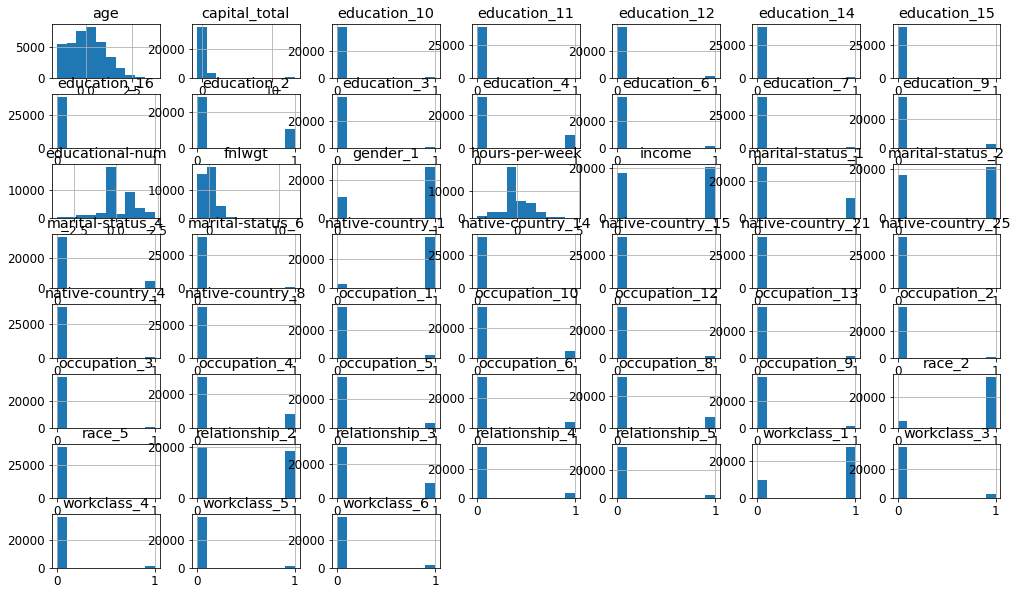

In [212]:
#Observamos el comportamiento de las variables númericas.
df.hist(figsize=(17, 10))
plt.show()

In [213]:
print(df.columns.values)  # Nombre de las columnas que contiene  el dataset

['age' 'hours-per-week' 'educational-num' 'capital_total' 'fnlwgt'
 'workclass_1' 'workclass_3' 'workclass_4' 'workclass_5' 'workclass_6'
 'education_2' 'education_3' 'education_4' 'education_6' 'education_7'
 'education_9' 'education_10' 'education_11' 'education_12' 'education_14'
 'education_15' 'education_16' 'marital-status_1' 'marital-status_2'
 'marital-status_4' 'marital-status_6' 'occupation_1' 'occupation_2'
 'occupation_3' 'occupation_4' 'occupation_5' 'occupation_6'
 'occupation_8' 'occupation_9' 'occupation_10' 'occupation_12'
 'occupation_13' 'relationship_2' 'relationship_3' 'relationship_4'
 'relationship_5' 'race_2' 'race_5' 'gender_1' 'native-country_1'
 'native-country_4' 'native-country_8' 'native-country_14'
 'native-country_15' 'native-country_21' 'native-country_25' 'income']




*   Age: continuous. (Edad)
*   Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. (Tipo de Trabajo)
*   fnlwgt: continuous. (Factor de Expansión)
*   Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. (Nivel Educativo)
*   Education-num: continuous (Número de años que ha estudiado)
*   Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. (Estado civil)
*   Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. (Ocupación)
*   Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. (Posición en la familia)
*   Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. (Raza)
*   Sex: Female, Male. (Sexo)
*   Capital-gain: continuous (Ganancia capital)
*   Capital-loss: continuous. (Pérdida capital)
*   hours-per-week: continuous. (Horas de trabajo por semana)
*   Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. (Pais de Origen)

In [214]:
# Estadistica descriptiva rápida de las variables
df.describe()

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25,income
count,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000
mean,0.075800,0.092367,0.219425,0.190376,0.011626,0.734243,0.069040,0.035219,0.040388,0.049404,0.266153,0.029292,0.208177,0.033935,0.014995,0.081468,0.022656,0.008749,0.038020,0.010786,0.003982,0.001260,0.282370,0.542103,0.114812,0.009781,0.048656,0.021865,0.020755,0.220530,0.081154,0.101773,0.173895,0.031246,0.115039,0.038924,0.032497,0.476816,0.221186,0.084543,0.060491,0.872985,0.006229,0.703693,0.926374,0.015285,0.006492,0.001664,0.001141,0.002117,0.002961,0.532420
std,0.946101,0.969476,1.044668,1.609362,0.980257,0.436685,0.249004,0.181067,0.193281,0.212501,0.440981,0.165580,0.404839,0.178051,0.120832,0.269884,0.147250,0.092465,0.189155,0.102062,0.062826,0.035471,0.449029,0.497313,0.316774,0.096772,0.213843,0.144216,0.140480,0.411149,0.271361,0.300018,0.375406,0.170464,0.316269,0.191110,0.176580,0.498344,0.413649,0.276819,0.237505,0.326666,0.077234,0.454648,0.254801,0.121799,0.078016,0.039971,0.033607,0.043559,0.051585,0.498954
min,-1.578629,-3.181452,-3.531030,-0.715348,-1.679680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.630441,-0.034087,-0.419335,-0.132642,-0.655345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.025996,-0.034087,-0.030373,-0.132642,-0.110889,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.695819,0.594543,1.136512,-0.132642,0.437354,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0

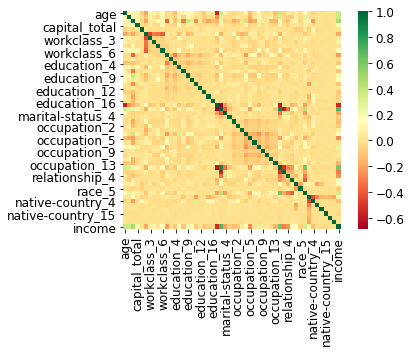

In [215]:
import seaborn as sns
# Revisamos la matriz de correlación
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [216]:
df['income'].value_counts()

1    20709
0    18187
Name: income, dtype: int64

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
!pip install featuretools

In [219]:
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [220]:
train_X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
0,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.244808,-0.034087,-0.419335,-0.132642,0.294612,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.776316,-0.034087,1.136512,0.783554,-1.433247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.849254,1.579946,-1.586221,-0.132642,1.221319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,0.243078,1.420458,-0.419335,-0.132642,-0.230362,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38892,1.630398,0.637604,-0.419335,-0.132642,-0.458168,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38893,0.114330,0.730340,-0.030373,0.843617,0.625350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38894,1.724358,0.231031,-2.225123,-0.168143,-0.633964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Support Vector Machine**

In [221]:
#  Configurar modelo svm
lsvc = LinearSVC(C=1,                              # Parámetro de regularización, este parametro se dejo como viene por defecto de la libreria
                 penalty="l1",                     # utilziamos regularizacion L1 para seleccion de caracteristicas 
                 max_iter = 20000,                 # Numero maximo de iteracion        
                 dual=False).fit(train_X, train_y)

prediccion = lsvc.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
confusion_matrix(test_y, prediccion)

array([[8161, 2916],
       [ 383, 3105]])

In [223]:
# Imprime el valor de los coeficientes
lsvc.coef_ 

array([[ 2.48757279e-01,  2.94259030e-01,  4.53356420e-01,
         7.99768641e-01,  3.37517950e-02,  4.23101682e-02,
        -1.92290934e-01,  2.36228084e-01, -2.38215720e-01,
         1.62636996e-01, -9.36314304e-03, -2.16710859e-01,
         1.06221198e-01,  1.44385837e-01, -3.63574510e-03,
         2.56190408e-02,  4.25144484e-01,  9.57021922e-02,
        -1.17093940e-02, -8.57464203e-02, -2.64246341e-02,
        -1.52426091e+00, -1.66473407e-01,  1.02967615e+00,
         8.84570494e-03,  3.72991554e-02, -2.47030597e-01,
        -8.08906128e-01,  2.03912424e-01,  6.50891134e-02,
        -5.82229482e-01,  1.86585086e-02,  2.95934713e-01,
         1.16792935e-01,  7.41800091e-02, -1.02848180e-01,
        -4.74640135e-01,  3.04868892e-01,  3.11532878e-01,
         1.80469413e-01,  9.92936410e-01,  1.11787557e-01,
        -4.56257881e-01,  3.75893477e-01,  1.14958183e-01,
        -4.43340293e-01,  6.26716809e-02, -2.74495563e-01,
        -9.71461037e-01,  3.54456344e-02,  3.62627001e-0

In [224]:
from sklearn.metrics import accuracy_score
print('Exactitud del modelo: {0:0.4f}'. format(accuracy_score(test_y, prediccion)))

Exactitud del modelo: 0.7735


In [225]:
# Predicciones con la base de entrenamiento
prediccion_train = lsvc.predict(train_X)

In [226]:
from sklearn.metrics import accuracy_score
print('Exactitud de la base de entrenamiento: {0:0.4f}'. format(accuracy_score(train_y, prediccion_train)))

Exactitud de la base de entrenamiento: 0.9218


In [227]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# **Clasificador Naïve Bayes**

**Entrenamiento del modelo**

In [228]:
# Entrenar un clasificador Naive Bayes gaussiano con la base de entrenamiento
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
gnb = GaussianNB()

# Ajustar el modelo
gnb.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de prueba**

In [229]:
# Se obtienen los valores ajustados de y (y_pred) a partir de la base de prueba (X_test)
y_pred = gnb.predict(test_X)
y_pred 

array([0, 0, 0, ..., 0, 1, 1])

In [230]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud del modelo: {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

Exactitud del modelo: 0.6630


**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de entrenamiento**

In [231]:
# Se obtienen los valores ajustados de y (y_pred_train) a partir de la base de entreamiento (X_train)
y_pred_train = gnb.predict(train_X)
y_pred_train

array([0, 0, 1, ..., 1, 0, 1])

In [232]:
# Se calcula el score de la exactitud de los resultados
print('Exactitud de la base de entrenamiento: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train)))

Exactitud de la base de entrenamiento: 0.8431


**Comprobar sobreajuste o subajuste**





Se puede observar que no hay evidencia de sobreajsute.

In [233]:
# Imprime los accuracy scores
print('Exactitud de la base de entrenamiento: {:.4f}'.format(gnb.score(train_X, train_y)))
print('Exactitud del modelo: {:.4f}'.format(gnb.score(test_X, test_y)))

Exactitud de la base de entrenamiento: 0.8431
Exactitud del modelo: 0.6630


**Comparación entre la exactitud del modelo y la exactitud nula**

Se compara la exactitud del modelo con la exactitud nula, que hace referencia a la exactitud que se alcanza prediciendo siempre la clase más frecuente.

In [234]:
test_y

,income
12228,0
45062,0
37816,0
42082,0
45806,1
...,...
21767,0
41081,1
6619,0
15068,0


In [235]:
# df_test_y = pd.DataFrame()
# df_test_y['income'] = test_y -> test_y ya es un dataframe

In [236]:
# Se comprueba la distribución de las clases en la base de prueba
s_50 = test_y[(test_y.income == 1)]
i_50 = test_y[(test_y.income == 0)]

In [237]:
s_50 = s_50.shape[0]
i_50 = i_50.shape[0]

Se obtiene el score de exactitud de la clase más frecuente.

In [238]:
if s_50 > i_50:
  null_accuracy = (s_50/(s_50 + i_50))
  model_accuracy = gnb.score(test_X, test_y)
  print('Exacitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(gnb.score(test_X, test_y)))
else:
  null_accuracy = (i_50/(s_50 + i_50))
  model_accuracy = gnb.score(test_X, test_y)
  print('Exacitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(gnb.score(test_X, test_y)))

Exacitud nula: 0.7605
Exactitud del modelo: 0.6630


Se verifica si el modelo estimado es más exacto que la exactitud nula.

In [239]:
if model_accuracy > null_accuracy:
  print("El modelo estimado predice bien las clases")
else:
  print("El modelo estimado no predice bien las clases")

El modelo estimado no predice bien las clases


**Matriz de confusión**

In [240]:
# Imprime la matriz de confusión y la divide en cuatro partes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)
print('Confusion matrix\n\n', cm)
print('\nVerdaderos Positivos(VP) = ', cm[0,0])
print('\nVerdaderos negativos(TN) = ', cm[1,1])
print('\nFalsos positivos(FP) = ', cm[0,1])
print('\nFalsos negativos(FN) = ', cm[1,0])

Confusion matrix

 [[6492 4585]
 [ 324 3164]]

Verdaderos Positivos(VP) =  6492

Verdaderos negativos(TN) =  3164

Falsos positivos(FP) =  4585

Falsos negativos(FN) =  324


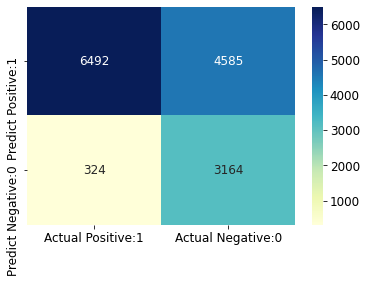

In [241]:
# Visualización de la matriz de confusión en un mapa de calor de Seaborn

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Reporte de clasificación**

En el reporte de clasificación se muestran las medidas de evaluación del modelo, tales como la precisión, la sensibilidad, el F1 y el soporte.

In [242]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73     11077
           1       0.41      0.91      0.56      3488

    accuracy                           0.66     14565
   macro avg       0.68      0.75      0.64     14565
weighted avg       0.82      0.66      0.69     14565



**Cálculo de las probabilidad de clases**

In [243]:
# Imprime las diez primeras probabilidades estimadas de las dos clases
y_pred_prob = gnb.predict_proba(test_X)[0:10]
y_pred_prob

array([[1.00000000e+000, 1.83239867e-023],
       [9.98765710e-001, 1.23429039e-003],
       [1.00000000e+000, 2.83887395e-130],
       [1.77640375e-009, 9.99999998e-001],
       [5.50281544e-021, 1.00000000e+000],
       [9.99999988e-001, 1.20397091e-008],
       [3.88878523e-001, 6.11121477e-001],
       [1.00000000e+000, 2.68056294e-014],
       [1.00000000e+000, 6.90886701e-026],
       [1.67845629e-012, 1.00000000e+000]])

In [244]:
# Guardar las probabilidades en un dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de <=50K', 'Prob de >50K'])
y_pred_prob_df

,Prob de <=50K,Prob de >50K
0,1.000000e+00,1.832399e-23
1,9.987657e-01,1.234290e-03
2,1.000000e+00,2.838874e-130
3,1.776404e-09,1.000000e+00
4,5.502815e-21,1.000000e+00
5,1.000000e+00,1.203971e-08
6,3.888785e-01,6.111215e-01
7,1.000000e+00,2.680563e-14
8,1.000000e+00,6.908867e-26
9,1.678456e-12,1.000000e+00


**Histograma de probabilidad de salario mayor a 50k**

Text(0, 0.5, 'Frecuencia')

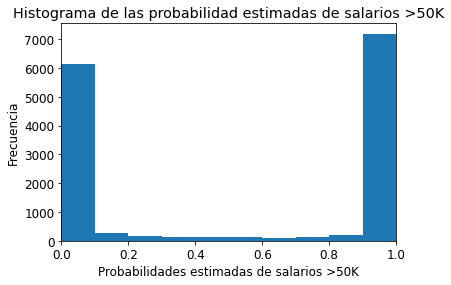

In [245]:
# Almacena las probabilidad estimadas para la clase 1 - Probabilidad de >50K
y_pred1 = gnb.predict_proba(test_X)[:, 1]

# Grafica un histograma de probabilidad estimadas:

# Ajuste del tamaño de la fuente
plt.rcParams['font.size'] = 12

# Grafica histograga con 10 bins
plt.hist(y_pred1, bins = 10)

# Título del histograma 
plt.title('Histograma de las probabilidad estimadas de salarios >50K')

# Fijar el límite del eje x
plt.xlim(0,1)

# Títulos de los ejes
plt.xlabel('Probabilidades estimadas de salarios >50K')
plt.ylabel('Frecuencia')

**ROC - AUC**

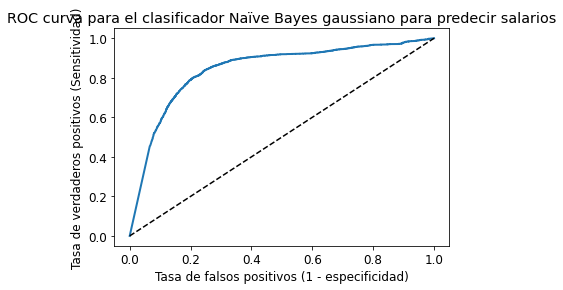

In [246]:
# Grafica la curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred1, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curva para el clasificador Naïve Bayes gaussiano para predecir salarios')
plt.xlabel('Tasa de falsos positivos (1 - especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensitividad)')
plt.show()

In [247]:
# Cálculo de ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(test_y, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8438


In [248]:
# Cálculo de cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, train_X, train_y, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross validated ROC AUC : 0.9329


In [249]:
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9329


In [250]:
# Aplicando 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, train_X, train_y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validation scores:[0.84473008 0.83161954 0.83290488 0.84395887 0.84344473 0.84395887
 0.84829005 0.85523271 0.83569041 0.84006171]
Average cross-validation score: 0.8420


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [251]:
print('Cross-validation scores:{}'.format(scores))
# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.84473008 0.83161954 0.83290488 0.84395887 0.84344473 0.84395887
 0.84829005 0.85523271 0.83569041 0.84006171]
Average cross-validation score: 0.8420


# **Regresión logística**

**Entrenamiento del modelo**

In [252]:
# Entrenar el modelo de regresión logística con la base de entrenamiento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the model
lg = LogisticRegression(solver='liblinear', random_state=0)

# Ajustar el modelo
lg.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de prueba**

In [253]:
# Se obtienen los valores ajustados de y (y_pred_lg) a partir de la base de prueba (X_test)
y_pred_lg = lg.predict(test_X)
y_pred_lg

array([0, 0, 0, ..., 0, 1, 0])

In [254]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud del modelo: {0:0.4f}'. format(accuracy_score(test_y, y_pred_lg)))

Exactitud del modelo: 0.7740


**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de entrenamiento**

In [255]:
# Se obtienen los valores ajustados de y (y_pred_lg) a partir de la base de entrenamiento (X_train)
y_pred_train_lg = lg.predict(train_X)
y_pred_train_lg

array([0, 0, 0, ..., 1, 0, 1])

In [256]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud de la base de entrenamiento: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_lg)))

Exactitud de la base de entrenamiento: 0.9219


**Comprobar sobreajuste o subajuste**

Se puede observar que no hay evidencia de sobreajsute

In [257]:
# Imprime los accuracy scores
print('Exactitud de la base de entrenamiento: {:.4f}'.format(lg.score(train_X, train_y)))
print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))

Exactitud de la base de entrenamiento: 0.9219
Exactitud del modelo: 0.7740


**Comparación entre la exactitud del modelo y la exactitud nula**

Se compara la exactitud del modelo con la exactitud nula, que hace referencia a la exactitud que se alcanza prediciendo siempre la clase más frecuente

In [258]:
# df_test_y_2 = pd.DataFrame()
# df_test_y_2['income'] = test_y

In [259]:
# Se comprueba la distribución de las clases en la base de prueba
s_50 = test_y[(test_y.income == 1)]
i_50 = test_y[(test_y.income == 0)]

In [260]:
s_50 = s_50.shape[0]
i_50 = i_50.shape[0]

Se obtiene el score de exactitud de la clase más frecuente.

In [261]:
if s_50 > i_50:
  null_accuracy = (s_50/(s_50 + i_50))
  model_accuracy_lg = lg.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))
else:
  null_accuracy = (i_50/(s_50 + i_50))
  model_accuracy_lg = lg.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))

Exactitud nula: 0.7605
Exactitud del modelo: 0.7740


Se verifica si el modelo estimado es más exacto que la exactitud nula

In [262]:
if model_accuracy_lg > null_accuracy:
  print("El modelo estimado predice bien las clases")
else:
  print("El modelo estimado no predice bien las clases")

El modelo estimado predice bien las clases


**Matriz de confusión**

In [263]:
# Imprime la matriz de confusión y la divide en cuatro partes
from sklearn.metrics import confusion_matrix

cm_lg = confusion_matrix(test_y, y_pred_lg)
print('Confusion matrix\n\n', cm)
print('\nVerdaderos Positivos(VP) = ', cm_lg[0,0])
print('\nVerdaderos negativos(TN) = ', cm_lg[1,1])
print('\nFalsos positivos(FP) = ', cm_lg[0,1])
print('\nFalsos negativos(FN) = ', cm_lg[1,0])

Confusion matrix

 [[6492 4585]
 [ 324 3164]]

Verdaderos Positivos(VP) =  8171

Verdaderos negativos(TN) =  3102

Falsos positivos(FP) =  2906

Falsos negativos(FN) =  386


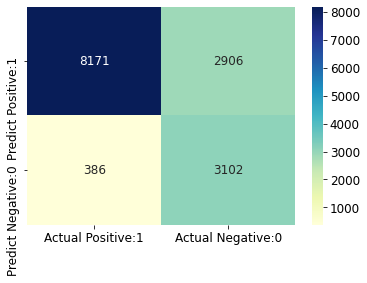

In [264]:
# Visualización de la matriz de confusión en un mapa de calor de Seaborn

cm_lg_matrix = pd.DataFrame(data=cm_lg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_lg_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Reporte de clasificación**

En el reporte de clasificación se muestran las medidas de evaluación del modelo, tales como la precisión, la sensibilidad, el F1 y el soporte.

In [265]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_lg))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11077
           1       0.52      0.89      0.65      3488

    accuracy                           0.77     14565
   macro avg       0.74      0.81      0.74     14565
weighted avg       0.85      0.77      0.79     14565



**Cálculo de las probabilidades de clase**

In [266]:
# Imprime las diez primeras probabilidades estimadas de las dos clases
y_pred_lg_prob = lg.predict_proba(test_X)[0:10]
y_pred_lg_prob

array([[9.99266360e-01, 7.33639726e-04],
       [9.97939787e-01, 2.06021278e-03],
       [9.99581910e-01, 4.18089805e-04],
       [5.06663532e-02, 9.49333647e-01],
       [1.18862070e-01, 8.81137930e-01],
       [9.53948240e-01, 4.60517603e-02],
       [9.93639911e-01, 6.36008925e-03],
       [4.95719573e-01, 5.04280427e-01],
       [9.99991421e-01, 8.57920540e-06],
       [2.05814215e-02, 9.79418578e-01]])

In [267]:
# Guardar las probabilidades en un dataframe
y_pred_lg_prob_df = pd.DataFrame(data=y_pred_lg_prob, columns=['Prob de <=50K', 'Prob de >50K'])
y_pred_lg_prob_df

,Prob de <=50K,Prob de >50K
0,0.999266,0.000734
1,0.997940,0.002060
2,0.999582,0.000418
3,0.050666,0.949334
4,0.118862,0.881138
5,0.953948,0.046052
6,0.993640,0.006360
7,0.495720,0.504280
8,0.999991,0.000009
9,0.020581,0.979419


**Histograma de probabilidad de salario mayor a 50k**

Text(0, 0.5, 'Frecuencia')

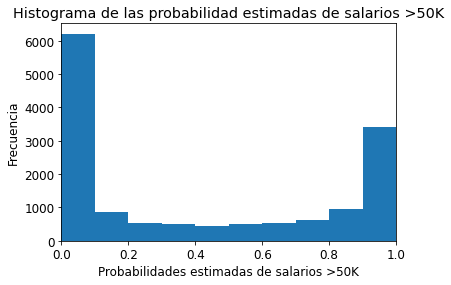

In [268]:
# Almacena las probabilidad estimadas para la clase 1 - Probabilidad de >50K
y_pred1_lg = lg.predict_proba(test_X)[:, 1]

# Grafica un histograma de probabilidad estimadas:

# Ajuste del tamaño de la fuente
plt.rcParams['font.size'] = 12

# Grafica histograga con 10 bins
plt.hist(y_pred1_lg, bins = 10)

# Título del histograma 
plt.title('Histograma de las probabilidad estimadas de salarios >50K')

# Fijar el límite del eje x
plt.xlim(0,1)

# Títulos de los ejes
plt.xlabel('Probabilidades estimadas de salarios >50K')
plt.ylabel('Frecuencia')

**ROC - AUC**

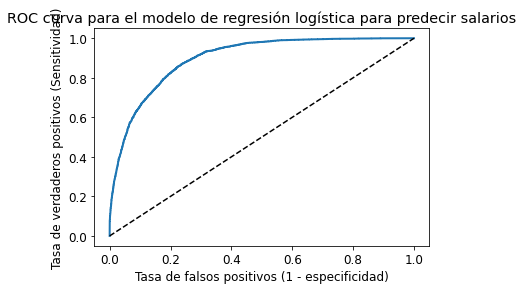

In [269]:
# Grafica la curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred1_lg, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curva para el modelo de regresión logística para predecir salarios')
plt.xlabel('Tasa de falsos positivos (1 - especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensitividad)')
plt.show()

In [270]:
# Cálculo de ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC_lg = roc_auc_score(test_y, y_pred1_lg)
print('ROC AUC : {:.4f}'.format(ROC_AUC_lg))

ROC AUC : 0.8977


In [271]:
# Cálculo de cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC_lg = cross_val_score(lg, train_X, train_y, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_lg))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross validated ROC AUC : 0.9770


In [272]:
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_lg))

Cross validated ROC AUC : 0.9770


In [273]:
# Aplicando 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores_lg = cross_val_score(lg, train_X, train_y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_lg))

# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores_lg.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validation scores:[0.92596401 0.93007712 0.92647815 0.91722365 0.92005141 0.91568123
 0.92723065 0.91797377 0.91360247 0.92003086]
Average cross-validation score: 0.9214


In [274]:
print('Cross-validation scores:{}'.format(scores_lg))
# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores_lg.mean()))

Cross-validation scores:[0.92596401 0.93007712 0.92647815 0.91722365 0.92005141 0.91568123
 0.92723065 0.91797377 0.91360247 0.92003086]
Average cross-validation score: 0.9214


# **Random Forest**

**Entrenamiento del modelo**

In [275]:
# Se importa el modelo
from sklearn.ensemble import RandomForestClassifier

# Se instancia el modelo con 1000 árboles de decisión
rf = RandomForestClassifier(n_estimators = 3, random_state = 42)

# Se entrena el modelo con los datos de entrenamiento
rf.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de prueba**

In [276]:
# Se obtienen los valores ajustados de y (y_pred_rf) a partir de la base de prueba (X_test)
y_pred_rf = rf.predict(test_X)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [277]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud del modelo: {0:0.4f}'. format(accuracy_score(test_y, y_pred_rf)))

Exactitud del modelo: 0.8062


**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de entrenamiento**

In [278]:
# Se obtienen los valores ajustados de y (y_pred_rf) a partir de la base de entrenamiento (X_train)
y_pred_train_rf = rf.predict(train_X)
y_pred_train_rf

array([0, 0, 0, ..., 1, 1, 1])

In [279]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud de la base de entrenamiento: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_rf)))

Exactitud de la base de entrenamiento: 0.9943


**Comprobar sobreajuste o subajuste**


Se puede observar que no hay evidencia de sobreajsute

In [280]:
# Imprime los accuracy scores
print('Exactitud de la base de entrenamiento: {:.4f}'.format(rf.score(train_X, train_y)))
print('Exactitud del modelo: {:.4f}'.format(rf.score(test_X, test_y)))

Exactitud de la base de entrenamiento: 0.9943
Exactitud del modelo: 0.8062


**Comparación entre la exactitud del modelo y la exactitud nula**

Se compara la exactitud del modelo con la exactitud nula, que hace referencia a la exactitud que se alcanza prediciendo siempre la clase más frecuente

In [281]:
# df_test_y_3 = pd.DataFrame()
# df_test_y_3['income'] = test_y

In [282]:
# Se comprueba la distribución de las clases en la base de prueba
s_50 = test_y[(test_y.income == 1)]
i_50 = test_y[(test_y.income == 0)]

In [283]:
s_50 = s_50.shape[0]
i_50 = i_50.shape[0]

Se obtiene el score de exactitud de la clase más frecuente

In [284]:
if s_50 > i_50:
  null_accuracy = (s_50/(s_50 + i_50))
  model_accuracy_rf = rf.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(model_accuracy_rf))
else:
  null_accuracy = (i_50/(s_50 + i_50))
  model_accuracy_rf = rf.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(model_accuracy_rf))

Exactitud nula: 0.7605
Exactitud del modelo: 0.8062


Se verifica si el modelo estimado es más exacto que la exactitud nula.

In [285]:
if model_accuracy_rf > null_accuracy:
  print("El modelo estimado predice bien las clases")
else:
  print("El modelo estimado no predice bien las clases")

El modelo estimado predice bien las clases


**Matriz de confusión**

In [286]:
# Imprime la matriz de confusión y la divide en cuatro partes
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_y, y_pred_rf)
print('Confusion matrix\n\n', cm_rf)
print('\nVerdaderos Positivos(VP) = ', cm_rf[0,0])
print('\nVerdaderos negativos(TN) = ', cm_rf[1,1])
print('\nFalsos positivos(FP) = ', cm_rf[0,1])
print('\nFalsos negativos(FN) = ', cm_rf[1,0])

Confusion matrix

 [[8912 2165]
 [ 657 2831]]

Verdaderos Positivos(VP) =  8912

Verdaderos negativos(TN) =  2831

Falsos positivos(FP) =  2165

Falsos negativos(FN) =  657


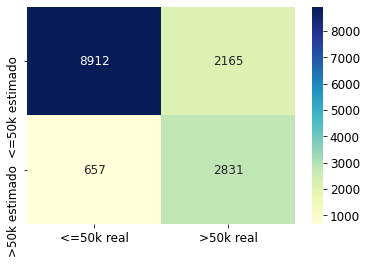

In [287]:
# Visualización de la matriz de confusión en un mapa de calor de Seaborn

cm_rf_matrix = pd.DataFrame(data=cm_rf, columns=['<=50k real', '>50k real'], 
                                 index=['<=50k estimado', '>50k estimado'])

sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Reporte de clasificación**

En el reporte de clasificación se muestran las medidas de evaluación del modelo, tales como la precisión, la sensibilidad, el F1 y el soporte

In [288]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11077
           1       0.57      0.81      0.67      3488

    accuracy                           0.81     14565
   macro avg       0.75      0.81      0.77     14565
weighted avg       0.84      0.81      0.82     14565



Cálculo de la probabilidad de clase

In [289]:
# Imprime las diez primeras probabilidades estimadas de las dos clases
y_pred_rf_prob = rf.predict_proba(test_X)[0:10]
y_pred_rf_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [290]:
# Guardar las probabilidades en un dataframe
y_pred_rf_prob_df = pd.DataFrame(data=y_pred_rf_prob, columns=['Prob de <=50K', 'Prob de >50K'])
y_pred_rf_prob_df

,Prob de <=50K,Prob de >50K
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.333333,0.666667
4,0.000000,1.000000
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,0.000000,1.000000


**Histograma de probabilidad de salario mayor a 50k**

Text(0, 0.5, 'Frecuencia')

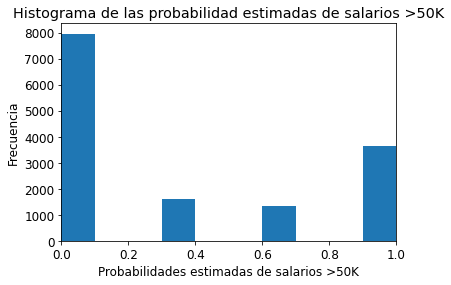

In [291]:
# Almacena las probabilidad estimadas para la clase 1: Probabilidad de >50K
y_pred1_rf = rf.predict_proba(test_X)[:, 1]

# Grafica un histograma de probabilidad estimadas:

# Ajuste del tamaño de la fuente
plt.rcParams['font.size'] = 12

# Grafica histograga con 10 bins
plt.hist(y_pred1_rf, bins = 10)

# Título del histograma 
plt.title('Histograma de las probabilidad estimadas de salarios >50K')

# Fijar el límite del eje x
plt.xlim(0,1)

# Títulos de los ejes
plt.xlabel('Probabilidades estimadas de salarios >50K')
plt.ylabel('Frecuencia')

**ROC - AUC**

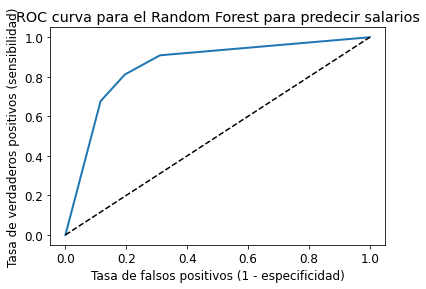

In [292]:
# Grafica la curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred1_rf, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curva para el Random Forest para predecir salarios')
plt.xlabel('Tasa de falsos positivos (1 - especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.show()

In [293]:
# Cálculo de ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC_rf = roc_auc_score(test_y, y_pred1_rf)
print('ROC AUC : {:.4f}'.format(ROC_AUC_rf))

ROC AUC : 0.8555


In [294]:
# Cálculo de cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC_rf = cross_val_score(rf, train_X, train_y, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_rf))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Cross validated ROC AUC : 0.9849


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [295]:
# Aplicando 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(rf, train_X, train_y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_rf))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Cross-validation scores:[0.94730077 0.95089974 0.94910026 0.97326478 0.96683805 0.9688946
 0.97120082 0.97094369 0.96580098 0.9724865 ]


In [296]:
# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores_rf.mean()))

Average cross-validation score: 0.9637


In [297]:
test_X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
12228,-0.557504,-1.083209,-0.419335,-0.132642,0.071294,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0
45062,-1.068066,-1.970927,1.136512,-0.132642,-0.974586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
37816,-0.995129,-0.034087,-1.975183,-0.132642,0.112827,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
42082,-0.338691,2.548367,-0.419335,-0.132642,0.079798,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
45806,-0.119879,-0.034087,-0.030373,-0.132642,-0.015105,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,-0.046942,-0.034087,-0.030373,-0.132642,-0.810301,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
41081,-0.119879,0.772930,-0.030373,0.454076,-0.010427,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
6619,1.849433,3.113278,-0.419335,-0.368347,-1.362539,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
15068,-0.703379,-0.034087,-0.419335,-0.132642,2.088501,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0


In [298]:
y_hat = rf.predict_proba(test_X)[:, 1]
y_hat = pd.DataFrame(y_hat)
y_hat.columns = ['income']
y_hat

,income
0,0.000000
1,0.000000
2,0.000000
3,0.666667
4,1.000000
...,...
14560,1.000000
14561,1.000000
14562,0.333333
14563,0.333333


In [299]:
(y_hat 
  .groupby("income")
  .agg(frequency=("income", "count")))

,frequency
income,
0.000000,7955
0.333333,1614
0.666667,1356
1.000000,3640
